### Importing libraries

In [1]:
# improting libraries and scikit-learn

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Importing data set and wrangling it

In [2]:
# Define path

path = r"C:\Users\caden\OneDrive\Desktop\Open Source Data Final Project"

In [5]:
# Import Data Set

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'Merged.csv'), index_col = False)

In [6]:
df.head()

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Social Support,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,2015,Switzerland,1,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2.517
1,2015,Iceland,2,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2.702
2,2015,Denmark,3,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2.492
3,2015,Norway,4,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2.465
4,2015,Canada,5,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2.452


In [7]:
# Rename columns 

df.rename(columns = {'Happiness Rank' : 'Rank', 'Happiness Score': 'Score', 'Economy (GDP per Capita)': 'Economy', 'Health (Life Expectancy)': 'Health', 'Trust (Government Corruption)': 'Trust' }, inplace = True)

In [8]:
df.head()

,Year,Country,Rank,Score,Economy,Social Support,Health,Freedom,Trust,Generosity,Dystopia Residual
0,2015,Switzerland,1,7.587,1.397,1.350,0.941,0.666,0.420,0.297,2.517
1,2015,Iceland,2,7.561,1.302,1.402,0.948,0.629,0.141,0.436,2.702
2,2015,Denmark,3,7.527,1.325,1.361,0.875,0.649,0.484,0.341,2.492
3,2015,Norway,4,7.522,1.459,1.331,0.885,0.670,0.365,0.347,2.465
4,2015,Canada,5,7.427,1.326,1.323,0.906,0.633,0.330,0.458,2.452


### 04. Exploring data using scatterplot 

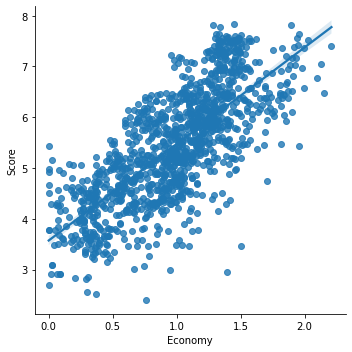

In [10]:
# Looking at the variables "Economy" and "Score"

sns.lmplot(x = 'Economy', y = 'Score', data = df)

### 05. Hypothesis:

### The higher the Economy score, the higher the Happiness Score.

### 06. Reshape the variables into NumPy arrays

In [11]:
# X being the independent variable and y being the dependent variable

x = df['Economy'].values.reshape(-1,1)
y = df['Score'].values.reshape(-1,1)

In [12]:
x

array([[1.397],
       [1.302],
       [1.325],
       ...,
       [0.947],
       [1.392],
       [0.758]])

### 07. Splitting data into training and test sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=0)

### 08. Run a linear regression on the data

In [14]:
# Create a regression object

regression = LinearRegression()

In [15]:
# Fit the regression object to the training data for each variable:

regression.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

### 09. Create a plot that shows the regression line on the test set

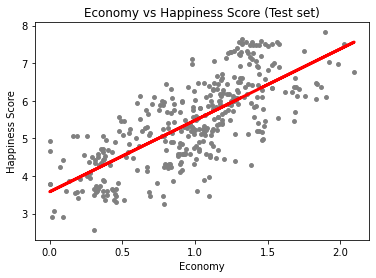

In [18]:
# Regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Economy vs Happiness Score (Test set)')
plot_test.xlabel('Economy')
plot_test.ylabel('Happiness Score')
plot_test.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\caden\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

### 10. Interpretation:

#### There appears to be a positive correlation between the two variables. As The Economy score goes up, so too does the Happiness score.

### 11. Check the model performance statistics

In [19]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score

In [20]:
# Print the model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[1.89724572]]
Mean squared error:  0.5857099850306919
R2 score:  0.5429783135559836


### 12. Compare predicted y values to actual y values

In [21]:
# Create a dataframe comparing the actual and predicted values of y

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,6.937,6.063903
1,6.454,5.893151
2,3.349,4.551798
3,4.483,5.760344
4,5.515,5.722399
5,5.925,5.200656
6,5.711,6.786754
7,5.878,5.024212
8,4.596,5.325874
9,6.436,5.100102


### Thoughts

#### The slope of 1.89724572 suggests that there is a positive relationship betweent the variables. Since the MSE score of 0.585 is small, it means that the regression line is a good fit. The R2 score of 0.54 is on the positive side of being a good fit, but only marginally. The actual and predicted values are also not too far off. All tests point to the Economy score being a positive indicator of a country's overall Happiness Score.

#### One bias would be the limiited number of data points.